<a href="https://colab.research.google.com/github/rovcosta/Evolucao_Populacional_BR/blob/main/BRASIL_EvolucaoPopulacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CONFIGURAÇÃOES/INSTALAÇÕES DE BIBLIOTECAS

In [ ]:
#A - MONTAR DRIVE
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# BIBLIOTECAS IMPORTANTES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
sns.set() #para os gráficos virem configurados por padrão pelo seaborn
!pip install --upgrade geopandas
!pip install mapclassify
# !pip install --upgrade plotly
# import plotly
# import plotly.express as px
import geopandas as gpd

from matplotlib.colors import TwoSlopeNorm 



     |████████████████████████████████| 1.0 MB 32.6 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 40.2 MB/s 


In [ ]:
drive_path = '/gdrive/MyDrive/VisualDadosMT/Evolucao Populacional'

In [ ]:
pd.options.display.float_format = '{:.1f}'.format
colunas = ['COD_IBGE','TERRITORIO','SIGLA','2015','2016','2017','2018','2019','2020']
df = pd.read_csv('/gdrive/MyDrive/VisualDadosMT/data/BR_evolucao_pop_2001_2020.csv',encoding='iso-8859-1',sep=';')

In [ ]:
df['var1520'] = (df['2020']-df['2015'])/df['2015']*100

In [ ]:
regiaodf = df.loc[(df['COD_IBGE']>=1)&(df['COD_IBGE']<=5)]
estadodf = df.loc[(df['COD_IBGE']>=11)&(df['COD_IBGE']<=53)]
municipiodf = df.loc[(df['COD_IBGE']>53)]
print('Regiões:',regiaodf.shape)
print('Estados:',estadodf.shape)
print('Municípios:',municipiodf.shape)

Regiões: (5, 22)
Estados: (27, 22)
Municípios: (5570, 22)


In [ ]:
qtd_municipiosBR = municipiodf['TERRITORIO'].count()

In [ ]:
var = municipiodf[['COD_IBGE','TERRITORIO','SIGLA','var1520','2015','2020']]
qtd_mun_aumento = var[var['var1520']>=0]['TERRITORIO'].count()
qtd_mun_diminuicao = var[var['var1520']<0]['TERRITORIO'].count()
qtd_municipiosBR = var['TERRITORIO'].count()
p_aum = (qtd_mun_aumento/qtd_municipiosBR)*100
p_dim = (qtd_mun_diminuicao/qtd_municipiosBR)*100
popt15 = var['2015'].sum()
popt20 = var['2020'].sum()
BR_aum = (popt20-popt15)
BR_Perc_aum = (popt20-popt15)/popt15*100
print('Municípios com aumento:{} ({:.0f}%)\nMunicípios com diminuicão:{} ({:.0f}%)'.format(qtd_mun_aumento,p_aum,qtd_mun_diminuicao,p_dim))
print('-'*34)
print('População BR 2015: {:,d}'.format(popt15))
print('Populaçã0 BR 2020: {:,d}'.format(popt20))
print('Aumnento BR 2015 a 2020: {:,d} ({:.2f}%)'.format(BR_aum,BR_Perc_aum))


Municípios com aumento:3541 (64%)
Municípios com diminuicão:2029 (36%)
----------------------------------
População BR 2015: 204,450,049
Populaçã0 BR 2020: 211,755,692
Aumnento BR 2015 a 2020: 7,305,643 (3.57%)


In [ ]:
var[['TERRITORIO','var1520']].sort_values(by='var1520',ascending=False).head()

,TERRITORIO,var1520
178,Pacaraima (RR),58.8
991,Guaramiranga (CE),38.0
170,Boa Vista (RR),30.8
579,Junco do Maranhão (MA),28.0
66,Cujubim (RO),24.8


In [ ]:
shape_file = gpd.read_file('/gdrive/MyDrive/VisualDadosMT/data/shapefile_lim_municipio_BR/lml_municipio_a.shp', encoding='utf-8')

In [ ]:
var['COD_IBGE'] = var['COD_IBGE'].astype(str)
# var.loc[('COD_IBGE').astype(str)]
geodata = pd.merge(var,shape_file, how='left',left_on='COD_IBGE', right_on='geocodigo' )
geodata.drop(['geometriaa','geocodigo','anoderefer'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Criação do geodf
geodf = gpd.GeoDataFrame(geodata)
geodf.shape

(5570, 8)

In [ ]:
#SEGUNDO SHAPE PARA LIMITES UNID. FEDERAÇÃO
shape_file2 = gpd.read_file('/gdrive/MyDrive/VisualDadosMT/data/shapefile_lim_unid_federacao_BR/lml_unidade_federacao_a.shp', encoding='utf-8')
ufgeodf = gpd.GeoDataFrame(shape_file2)

MONTAR O MAPA

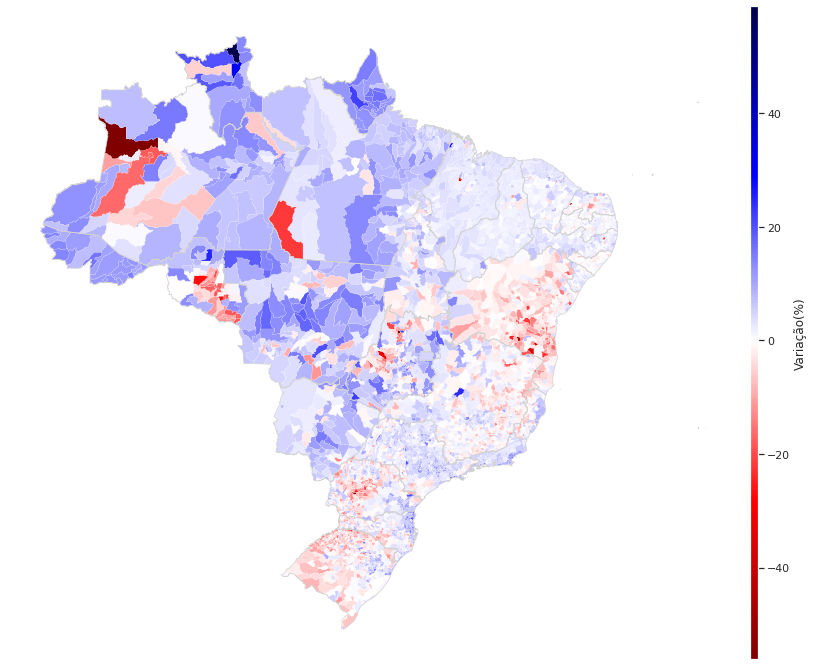

In [ ]:
#CONFIGURAÇÕES DE CORES DOS VALORES
min = geodf['var1520'].min()
max = geodf['var1520'].max()
divnorm = TwoSlopeNorm(vmin=min, vcenter=0, vmax=max)
#1 CRIA A FIGURA
fig, ax = plt.subplots(1, figsize=(16,12))

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.0)

#2CRIA O PLOT
geodf.plot(column='var1520',norm=divnorm,cmap='seismic_r', linewidth=0.1,edgecolor=None,
    ax=ax, cax=cax, legend=True, legend_kwds={'label': 'Variação(%)','orientation':"vertical"})


ufgeodf.geometry.boundary.plot(color=None,edgecolor='lightgray',linewidth = 0.7,ax=ax) #segundo shapefile dataframe para limites UF
# ax.set_title("Mapa 1. Variação populacional nos Municípios Brasileiros - 2015 a 2020",fontdict={'fontsize':'13','fontweight':'3'})
ax.axis('off')
fig.show()

In [ ]:
####SALVAR IMAGEM NO DRIVE####
fig.savefig(f"{drive_path}/BR_VariacaoPop_2015_2020.png", dpi=300,transparent=True, bbox_inches='tight')

#POPULAÇÃO TOTAL 2020

In [ ]:
ano_regiao = regiaodf[['TERRITORIO','2015','2016','2017','2018','2019','2020']]
ano_regiao = ano_regiao.set_index('TERRITORIO').rename_axis('Ano').T
ano_regiao

Ano,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
2015,17472636,56559481,85745520,29230180,15442232
2016,17707783,56915936,86356952,29439773,15660988
2017,17936201,57254159,86949714,29644948,15875907
2018,18182253,56760780,87711946,29754036,16085885
2019,18430980,57071654,88371433,29975984,16297074
2020,18672591,57374243,89012240,30192315,16504303


In [ ]:
ufmap = estadodf.loc[:,['COD_IBGE','SIGLA','2015','2020']]
ufmap['variacao'] = (ufmap['2020']-ufmap['2015'])/ufmap['2015']*100
ufmap['variacao_ABS'] = (ufmap['2020']-ufmap['2015'])

ufshapef = gpd.read_file('/gdrive/MyDrive/VisualDadosMT/data/shapefile_lim_unid_federacao_BR/lml_unidade_federacao_a.shp', encoding='utf-8')
ufmap['COD_IBGE'] = ufmap['COD_IBGE'].astype(str)
ufgeodata = pd.merge(ufmap,ufshapef, how='left',left_on='COD_IBGE', right_on='geocodigo' )
ufgeodata
# ufgeodata.drop(['geometriaa','geocodigo','anoderefer'], axis=1, inplace=True)

ufgeodata = gpd.GeoDataFrame(ufgeodata)
ufgeodata.shape


(27, 11)

In [ ]:
ufmap.set_index('SIGLA', inplace=True)
# ufmap = ufmap.sort_values(by='variacao', ascending=False, inplace=True)

PERCENTUAL POPULAÇÃO MUNICIPAL EM RELAÇÃO AO TOTAL DO ESTADO

In [ ]:
PerMunUf = geodf
PerMunUf['total'] = PerMunUf.groupby('SIGLA')['2020'].transform('sum')
PerMunUf['percent'] = PerMunUf['2020']/PerMunUf['total']*100
PerMunUf.head(2).sort_values(by='percent',ascending=False)

,COD_IBGE,TERRITORIO,SIGLA,var1520,2015,2020,nome,geometry,total,percent
1,1100023,Ariquemes (RO),RO,4.9,104401,109523,Ariquemes,"POLYGON ((-63.59631 -10.00039, -63.59672 -9.99...",1796460,6.1
0,1100015,Alta Floresta D'Oeste (RO),RO,-11.1,25578,22728,Alta Floresta D'Oeste,"POLYGON ((-62.05037 -11.86736, -62.04883 -11.8...",1796460,1.3


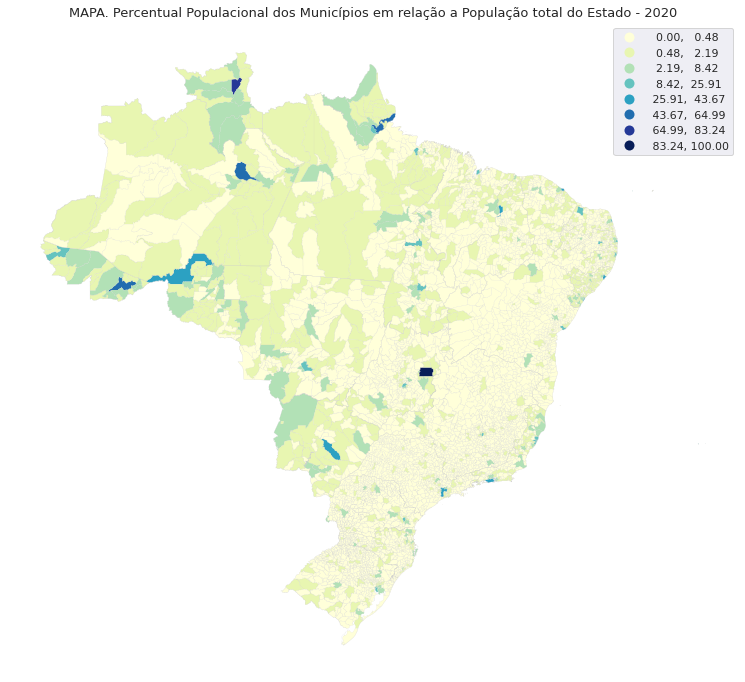

In [ ]:
#CONFIGURAÇÕES DE CORES DOS VALORES
# min = PerMunUf['percent'].min()
# max = PerMunUf['percent'].max()
# divnorm = TwoSlopeNorm(vmin=min, vcenter=0, vmax=max)
#1 CRIA A FIGURA
fig3, ax = plt.subplots(1, figsize=(16,12))
#2CRIA O PLOT
PerMunUf.plot(
    column='percent',
    # norm=divnorm,
    scheme ='headtailbreaks', 
    cmap='YlGnBu', #coolwarm_r,RdYlBu,
    linewidth=0.1,
    edgecolor='0.8',
    ax=ax,
    legend=True
    # legend_kwds={'label': 'Percentual (%)','orientation':"vertical"} 
    )
ufgeodf.geometry.boundary.plot(color=None,edgecolor='0.8',linewidth = 0.1,ax=ax) #segundo shapefile dataframe para limites UF
ax.set_title("MAPA. Percentual Populacional dos Municípios em relação a População total do Estado - 2020",fontdict={'fontsize':'13','fontweight':'3'})
ax.axis('off')
fig3.show()

In [ ]:
####SALVAR IMAGEM NO DRIVE####
# images_dir = '/gdrive/MyDrive/EU_CIENTISTA DE DADOS/Data Science/VisualDadosMT/produtos'
# fig3.savefig(f"{images_dir}/BR_PercentPop2020_TotalUF(3).png", dpi=300,transparent=True, bbox_inches='tight')

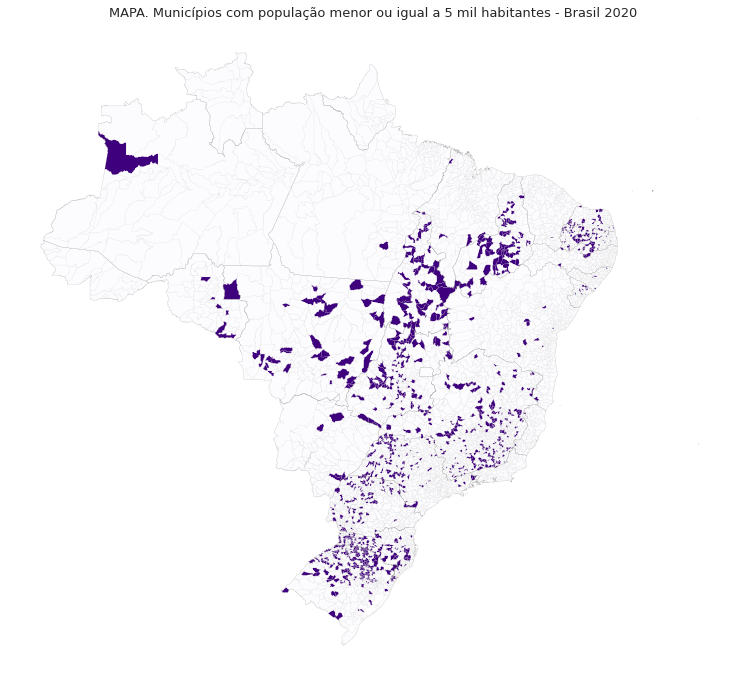

In [ ]:
fig4, ax = plt.subplots(1, figsize=(16,12))
#2CRIA O PLOT
PerMunUf.plot(
    column=PerMunUf['2020']<=5000,
    # norm=divnorm,
    # scheme ='headtailbreaks', 
    cmap='Purples', #coolwarm_r,RdYlBu,
    linewidth=0.1,
    edgecolor='0.8',
    ax=ax,
    # legend=True
    # legend_kwds={'label': 'Percentual (%)','orientation':"vertical"} 
    )
ufgeodf.geometry.boundary.plot(color='Grey',edgecolor='0.8',linewidth = 0.1,ax=ax) #segundo shapefile dataframe para limites UF
ax.set_title("MAPA. Municípios com população menor ou igual a 5 mil habitantes - Brasil 2020",fontdict={'fontsize':'13','fontweight':'3'})
ax.axis('off')
fig4.show()

In [ ]:
####SALVAR IMAGEM NO DRIVE####
# images_dir = '/gdrive/MyDrive/EU_CIENTISTA DE DADOS/Data Science/VisualDadosMT/produtos'
# fig4.savefig(f"{images_dir}/BR_Mun<5mil_2020.png", dpi=300,transparent=True, bbox_inches='tight')

In [ ]:
Pop5mil = PerMunUf.loc[(PerMunUf['2020']<=5000)]
Pop5mil = Pop5mil.loc[:,['TERRITORIO','2020']]
Pop5mil.sort_values(by='2020', ascending=True)

,TERRITORIO,2020
3026,Serra da Saudade (MG),776
3348,Borá (SP),838
5192,Araguainha (MT),946
4749,Engenho Velho (RS),982
5077,União da Serra (RS),1118
...,...,...
2488,Divino das Laranjeiras (MG),4974
2834,Pingo d'Água (MG),4986
2564,Guaraciama (MG),4989
1134,Japi (RN),4995


# TESTANDO LAYOUTS "Storytelling book" WITH MATPLOTLIB
- Novos mapas e gráficos com novos componentes
- FORMATAR VALORES NAS BARRAS: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

In [ ]:
varEstados = ufmap.sort_values(by='variacao', ascending=False)
varEstados.head()

,COD_IBGE,2015,2020,variacao,variacao_ABS
SIGLA,,,,,
RR,14,505665,631181,24.8,125516
AP,16,766679,861773,12.4,95094
AC,12,803513,894470,11.3,90957
MT,51,3265486,3526220,8.0,260734
GO,52,6610681,7113540,7.6,502859


In [ ]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# define colors
GRAY1, GRAY2, GRAY3, GRAY4, GRAY5, GRAY6, GRAY7, GRAY8, GRAY9 = '#231F20', '#414040', '#555655','#646369', '#76787B', '#828282','#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2, RED3, RED4= '#800000','#C3514E', '#E6BAB7',' #ff8080'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.bf'] = 'Arial:bold'
mpl.rcParams['mathtext.it'] = 'Arial:italic'

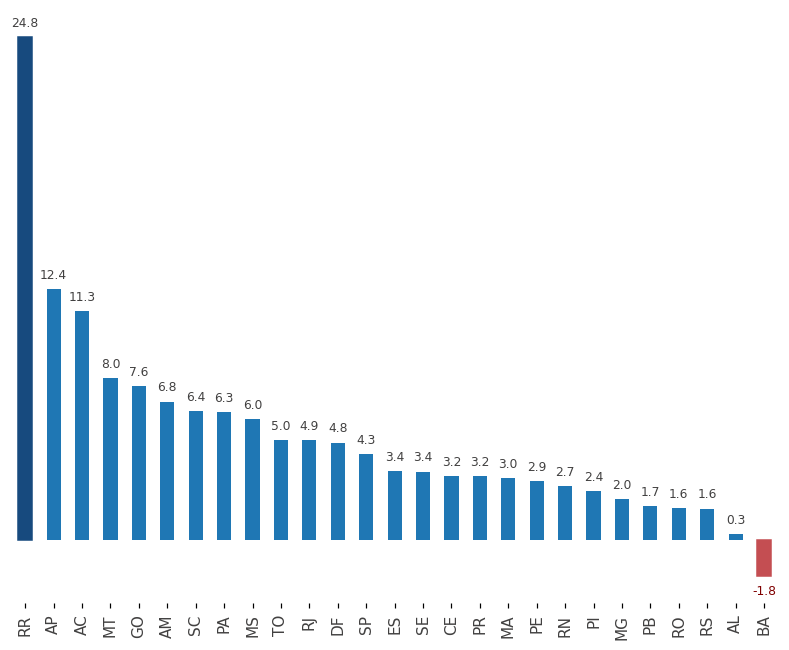

In [ ]:
mpl.style.use('default')

#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(9, 7),dpi=110)
# plt.subplots_adjust(left=0, right=0.73, top=0.665, bottom=0.17)

g = varEstados.plot(kind='bar', y='variacao', ax=ax, legend=None)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

# configure responses labels appearance
for item in plt.gca().get_xticklabels():
    item.set_fontsize(10)
    item.set_color(GRAY2)

plt.yticks([])                            
plt.xticks(rotation='90')
plt.xlabel(None)
ax.set_facecolor('None')

# Title
# plt.text(1.9, 23,'$\\bf{VARIACAO\ POPULACIONAL}$ - BRASIL\n',fontsize=16)
         # put a rectangular box around the text to set a background color
         #bbox={'facecolor': GRAY7,  # background color  #'pad': 10,  # add more padding  # 'edgecolor': 'none'})  # no border
# Subtitle 1
# plt.text(1.9, 17.2,'$\\bf{2015\ -\ 2020}$\n', fontsize=30, linespacing=1.45, color=BLUE2)
# Subtitle 2
# plt.text(1.9, 16.5,'Com $\\bf{+24.8}$% de variação, o estado de $\\bf{Roraima}$ apresentou o maior aumento \npopulacional do Brasil nos últimos 5 anos.',
#          fontsize=11, linespacing=1.45,color=GRAY2)

# Footnote with the data source
# plt.text(1.9, 19.2,'Fonte: IBGE, Estativas da População',fontsize=8,color=GRAY3)

# for p in ax.patches:
#    ax.annotate('{:.1f}'.format((p.get_height())), (p.get_x()-0.1, p.get_height()+0.5), fontsize=8, color=GRAY3)

def add_value_labels(ax, spacing=5):
    # For each bar: Place a label
    for rect in ax.patches:
        y_value = rect.get_height() # Get X and Y placement of label from rect.
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing        # Number of points between bar and label. Change to your liking.
        va = 'bottom'          # Vertical alignment for positive values
        
        ax.get_children()[0].set_color(BLUE1)   # set darkest color for max value bar

        if y_value < 0:          # If value of bar is negative: Place label below bar
            rect.set_color('r')  # set color for negative values
            space *= -1          # Invert space to place label below
            va = 'top'           # Vertically align label at top
                   
        label = "{:.1f}".format(y_value)     # Use Y value as label and format number with one decimal place

        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',
            color=(RED1 if y_value < 0 else GRAY2),
            fontsize=8,
            va=va)                      # Vertically align label differently for

# call the function                                        
add_value_labels(ax)

fig.show()


In [ ]:
fig.savefig(f"{drive_path}/BR_AUMENTO_semTexto2.png", dpi=300,transparent=True, bbox_inches='tight')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


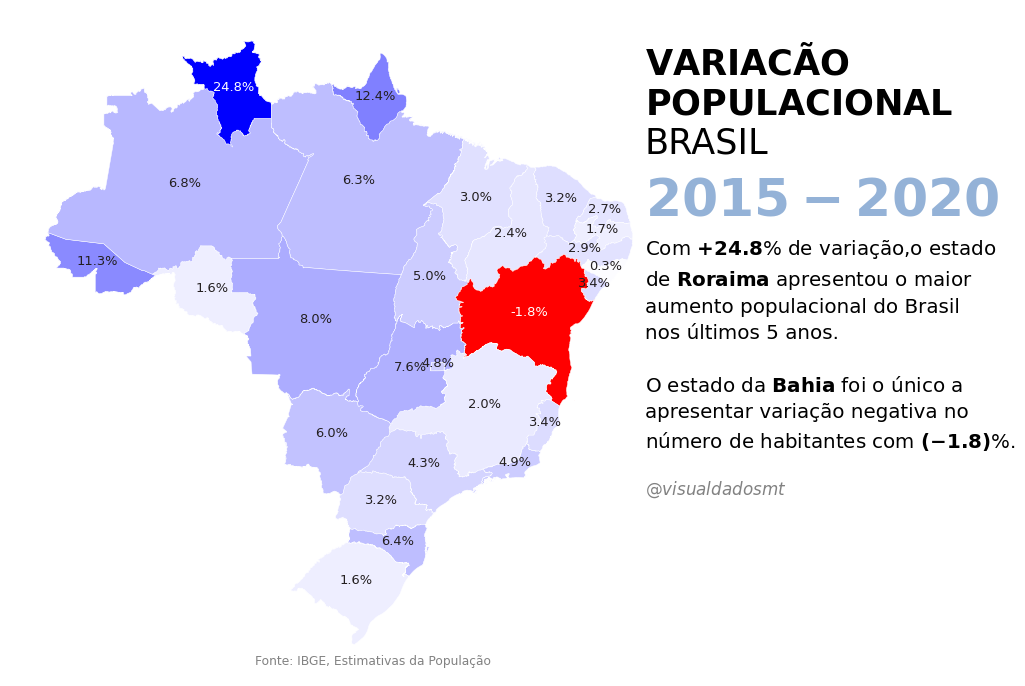

In [ ]:
#CONFIGURAÇÕES DE CORES DOS VALORES
min = ufgeodata['variacao'].min()
max = ufgeodata['variacao'].max()
divnorm = TwoSlopeNorm(vmin=min, vcenter=0, vmax=max)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="1%", pad=0.0)

#1 CRIA A FIGURA
fig2, ax = plt.subplots(figsize=(10, 8),dpi=110)
ax.axis('off')
# plt.xticks([])
# plt.yticks([])

#2CRIA O PLOT
ufgeodata.plot(column='variacao',norm=divnorm,cmap='bwr_r',linewidth=0.3,edgecolor='white', ax=ax, legend=True,
    legend_kwds={'label': 'Percentual (%)','orientation':"vertical"}, cax=cax)

# Title
plt.text(-34, -2,'$\\bf{VARIACÃO}$\n$\\bf{POPULACIONAL}$\nBRASIL',fontsize=23,color='black')
# Subtitle 1
plt.text(-34, -6,'$\\bf{2015-2020}$', fontsize=34, linespacing=1.45, color=BLUE3)
# Subtitle 2
plt.text(-34,-21, 'Com $\\bf{+24.8}$% de variação,o estado\nde $\\bf{Roraima}$ apresentou o maior\naumento populacional do Brasil\nnos últimos 5 anos.\n\n'
                  'O estado da $\\bf{Bahia}$ foi o único a\napresentar variação negativa no \nnúmero de habitantes com $\\bf{(-1.8)}$%.',
         fontsize=13, linespacing=1.45,color='black')
# Footnote with the data source
plt.text(-60, -35,'Fonte: IBGE, Estimativas da População',fontsize=8,color=GRAY6)

plt.text(-34, -24,'$\\it{@visualdadosmt}$',fontsize=11,color=GRAY6)
# plt.text(-34, -26,'$\\it{medium.com/visualdadosmt}$',fontsize=10,color=GRAY7)



# ufgeodata.apply(lambda x: ax.annotate(s=x.sigla+"\n", xy=x.geometry.centroid.coords[0], ha='center', fontsize=12,color=BLUE3),axis=1) #MOSTRAR ROTULO NOS MAPAS
ufgeodata.apply(lambda x: ax.annotate(s="{:.1f}%".format(x.variacao), xy=x.geometry.centroid.coords[0], ha='center',fontsize=8.5,
                                      color=('white' if x.variacao < 0 or x.variacao >20 else GRAY1)),axis=1)
                                      #bbox={'facecolor': GRAY9, 'pad': 4, 'edgecolor': 'none','boxstyle':'round,pad=0.1'},
# ufgeodf.geometry.boundary.plot(color=None,edgecolor='0.5',linewidth = 0.2,ax=ax) #segundo shapefile dataframe para limites UF

### LOGO IMAGEM
# from matplotlib.cbook import get_sample_data
# im = plt.imread(get_sample_data(f'{drive_path}/logo.png'))
# newax = fig2.add_axes([0.8, 0.01, 0.2, 0.2], anchor='NE', zorder=-1) #zorder=-1 to place the image in front of the axes
# newax.imshow(im)
# newax.axis('off')

# fig2.patch.set_facecolor('None')

fig2.show()

In [ ]:
fig2.savefig(f"{drive_path}/BR_AUMENTO_comTexto.jpeg", dpi=300,transparent=False, facecolor='lightgray', bbox_inches='tight')

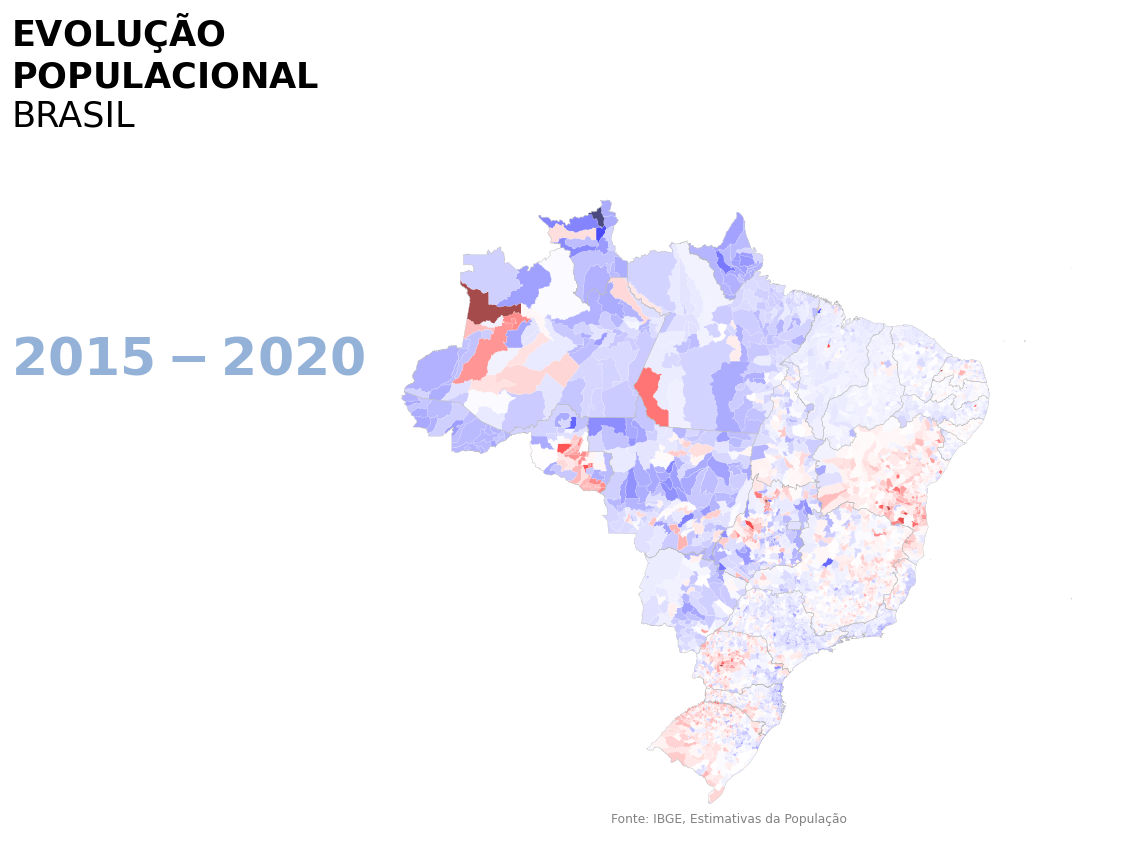

In [ ]:
#CONFIGURAÇÕES DE CORES DOS VALORES
min = geodf['var1520'].min()
max = geodf['var1520'].max()
divnorm = TwoSlopeNorm(vmin=min, vcenter=0, vmax=max)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.0)

#1 CRIA A FIGURA
fig2, ax = plt.subplots(figsize=(10, 8),dpi=110)
ax.axis('off')
# plt.xticks([])
# plt.yticks([])

#2CRIA O PLOT
geodf.plot(column='var1520',norm=divnorm,cmap='seismic_r',linewidth=0.1,edgecolor=None,alpha=.7, ax=ax, legend=True,
    legend_kwds={'label': 'Percentual (%)','orientation':"vertical"}, cax=cax)

# Title
plt.text(-100, 10,'$\\bf{EVOLUÇÃO}$\n$\\bf{POPULACIONAL}$\nBRASIL',fontsize=23,color='black')
# Subtitle 1
plt.text(-100, -6,'$\\bf{2015-2020}$', fontsize=34, linespacing=1.45, color=BLUE3)
# Subtitle 2
# plt.text(-34,-24, 'Cerca de 64% dos municípios brasileiros \napresentaram aumento populacional \ntotalizando 3.541. \n\n'
#   'Os municípios com maior aumento \npopulacional são Pacaraima-RR (58%), \n'
#   'Guaramiranga-CE (38%), Boa Vista-RR (30%), \nJunco do Maranhão-MA (28%) e Cujubim-RO (24%).',
#          fontsize=13, linespacing=1.45,color=GRAY2)
# Footnote with the data source
plt.text(-60, -35,'Fonte: IBGE, Estimativas da População',fontsize=8,color=GRAY6)

# plt.text(-34, -28,'$\\it{@visualdadosmt}$',fontsize=11,color=GRAY5)
# plt.text(-34, -26,'$\\it{medium.com/visualdadosmt}$',fontsize=10,color=GRAY7)



# ufgeodata.apply(lambda x: ax.annotate(s=x.SIGLA, xy=x.geometry.centroid.coords[0], ha='center', 
#                                      fontsize=9, color=GRAY6),axis=1) #('white' if x.variacao < 0 or x.variacao >20 else GRAY1),),axis=1) #MOSTRAR ROTULO NOS MAPAS
                                     #bbox={'facecolor': GRAY7, 'pad': 4, 'edgecolor': BLUE4,'boxstyle':'round,pad=0.1'}

ufgeodf.geometry.boundary.plot(color=None,edgecolor='0.7',linewidth = 0.2,ax=ax) #segundo shapefile dataframe para limites UF

### LOGO IMAGEM
# from matplotlib.cbook import get_sample_data
# im = plt.imread(get_sample_data(f'{drive_path}/logo.png'))
# newax = fig2.add_axes([0.8, 0.01, 0.2, 0.2], anchor='NE', zorder=-1) #zorder=-1 to place the image in front of the axes
# newax.imshow(im)
# newax.axis('off')

fig2.patch.set_facecolor('none')

fig2.show()

In [ ]:
geodf.columns

Index(['COD_IBGE', 'TERRITORIO', 'SIGLA', 'var1520', '2015', '2020', 'nome',
       'geometry', 'total', 'percent'],
      dtype='object')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


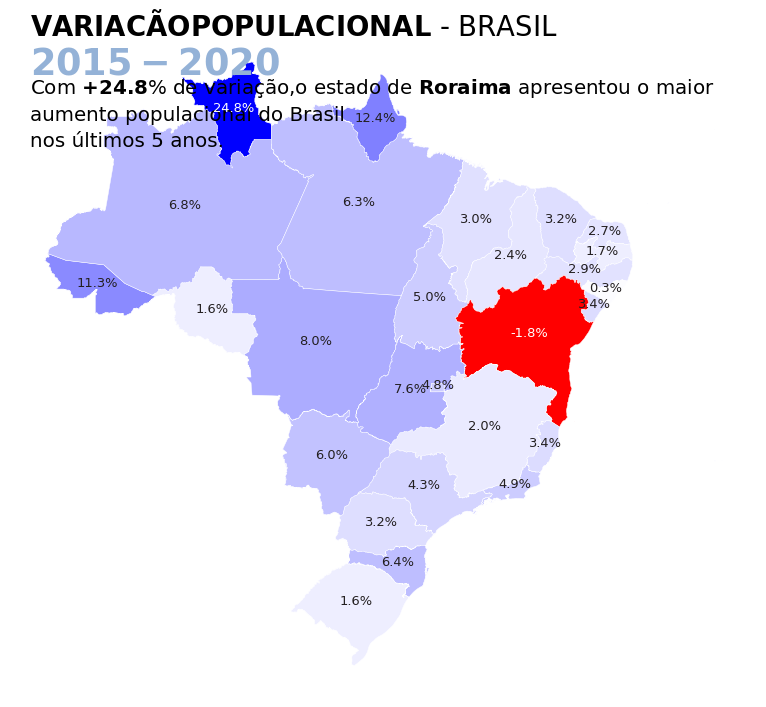

In [ ]:
#CONFIGURAÇÕES DE CORES DOS VALORES
min = ufgeodata['variacao'].min()
max = ufgeodata['variacao'].max()
divnorm = TwoSlopeNorm(vmin=min, vcenter=0, vmax=max)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="1%", pad=0.0)

#1 CRIA A FIGURA
fig2, ax = plt.subplots(figsize=(10, 8),dpi=110)
ax.axis('off')
# plt.xticks([])
# plt.yticks([])

#2CRIA O PLOT
ufgeodata.plot(column='variacao',norm=divnorm,cmap='bwr_r',linewidth=0.3,edgecolor='white', ax=ax, legend=True,
    legend_kwds={'label': 'Percentual (%)','orientation':"vertical"}, cax=cax)

# Title
plt.text(-75, 7,'$\\bf{VARIACÃO}$$\\bf{POPULACIONAL}$ - BRASIL',fontsize=18,color='black')
# Subtitle 1
plt.text(-75, 4.5,'$\\bf{2015-2020}$', fontsize=24, linespacing=1.45, color=BLUE3)
# Subtitle 2
plt.text(-75,-3.5, 'Com $\\bf{+24.8}$% de variação,o estado de $\\bf{Roraima}$ apresentou o maior\naumento populacional do Brasil\nnos últimos 5 anos.\n\n',
                  # 'O estado da $\\bf{Bahia}$ foi o único a\napresentar variação negativa no \nnúmero de habitantes com $\\bf{(-1.8)}$%.',
         fontsize=13, linespacing=1.45,color='black')
# Footnote with the data source
# plt.text(-60, -35,'Fonte: IBGE, Estimativas da População',fontsize=8,color=GRAY6)

# plt.text(-34, -24,'$\\it{@visualdadosmt}$',fontsize=11,color=GRAY6)
# plt.text(-34, -26,'$\\it{medium.com/visualdadosmt}$',fontsize=10,color=GRAY7)



# ufgeodata.apply(lambda x: ax.annotate(s=x.sigla+"\n", xy=x.geometry.centroid.coords[0], ha='center', fontsize=12,color=BLUE3),axis=1) #MOSTRAR ROTULO NOS MAPAS
ufgeodata.apply(lambda x: ax.annotate(s="{:.1f}%".format(x.variacao), xy=x.geometry.centroid.coords[0], ha='center',fontsize=8.5,
                                      color=('white' if x.variacao < 0 or x.variacao >20 else GRAY1)),axis=1)
                                      #bbox={'facecolor': GRAY9, 'pad': 4, 'edgecolor': 'none','boxstyle':'round,pad=0.1'},
# ufgeodf.geometry.boundary.plot(color=None,edgecolor='0.5',linewidth = 0.2,ax=ax) #segundo shapefile dataframe para limites UF

### LOGO IMAGEM
# from matplotlib.cbook import get_sample_data
# im = plt.imread(get_sample_data(f'{drive_path}/logo.png'))
# newax = fig2.add_axes([0.8, 0.01, 0.2, 0.2], anchor='NE', zorder=-1) #zorder=-1 to place the image in front of the axes
# newax.imshow(im)
# newax.axis('off')

# fig2.patch.set_facecolor('None')

fig2.show()